# Section 1 - Noisy Gaussian

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Center of data (mean)
xC = np.asarray([2, 1])
# Principal axes
sig = np.asarray([2, 0.5])
theta = np.pi / 3  # Rotation angle

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# Number of points
nPoints = 10000

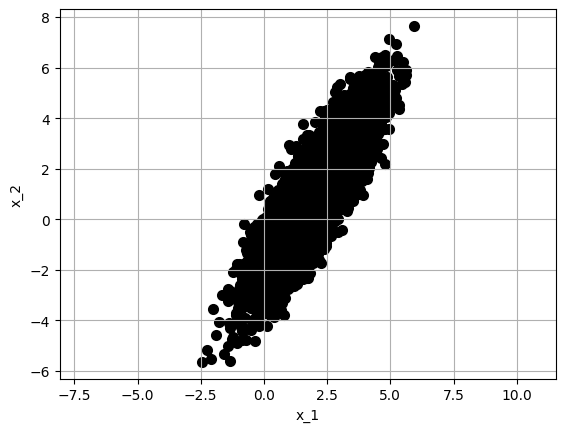

In [3]:
# Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + xC[:, np.newaxis]  # Broadcasting

# Scatter plot of the points
plt.scatter(X[0, :], X[1, :], color='k', linewidth=2)
plt.axis('equal')  # Set equal scaling
plt.grid(True)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.savefig('noisy_gaussian_data.png', dpi=300)
plt.show()


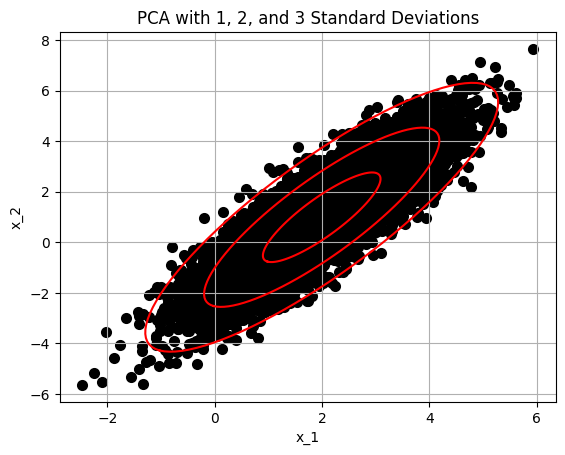

In [4]:
# Compute mean
Xavg = np.mean(X, axis=1)
B = X - Xavg[:, np.newaxis]  # Mean-subtracted Data

# PCA via SVD
U, S, Vt = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# Plot data again
plt.scatter(X[0, :], X[1, :], color='k', linewidth=2)

# 1-standard deviation confidence interval
theta = np.linspace(0, 2 * np.pi, 100)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# Plot the confidence intervals
plt.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], 'r-')  # 1 std
plt.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], 'r-')  # 2 std
plt.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], 'r-')  # 3 std

# Show plot
plt.title('PCA with 1, 2, and 3 Standard Deviations')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.savefig('noisy_gaussian_res.png', dpi=300)
plt.show()

In [5]:
U

array([[-0.49812907, -0.8671029 ],
       [-0.8671029 ,  0.49812907]])

In [6]:
S

array([2.02454967, 0.49588853])

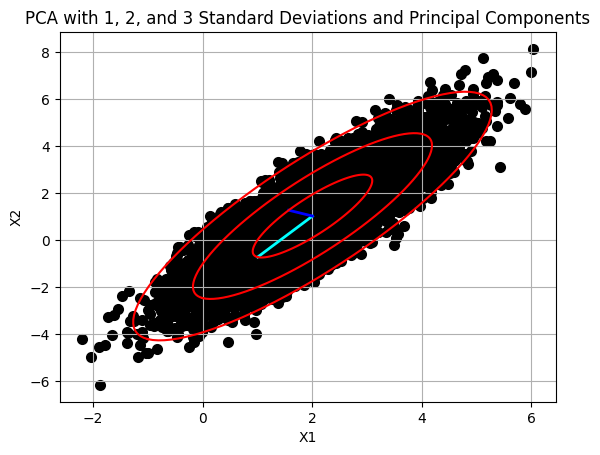

In [ ]:
# Compute mean
Xavg = np.mean(X, axis=1)
B = X - Xavg[:, np.newaxis]  # Mean-subtracted Data

# PCA via SVD
U, S, Vt = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# Plot data again
plt.scatter(X[0, :], X[1, :], color='k', linewidth=2)
V = Vt.T
# Plot the principal components in blue and cyan
for i in range(2):
    start = Xavg
    end = Xavg + U[i, :] * S[i]  # Scale the principal component by its singular value
    color = 'cyan' if i == 0 else 'blue'
    plt.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=2)

# 1-standard deviation confidence interval
theta = np.linspace(0, 2 * np.pi, 100)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# Plot the confidence intervals
plt.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], 'r-')  # 1 std
plt.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], 'r-')  # 2 std
plt.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], 'r-')  # 3 std

# Show plot
plt.title('PCA with 1, 2, and 3 Standard Deviations and Principal Components')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.savefig('noisy_gaussian_res.png', dpi=300)
plt.show()


In [ ]:
U

array([[-0.5007938 , -0.86556662],
       [-0.86556662,  0.5007938 ]])

# Section 2 - OvarianCancer data set

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load the data
## 1. Download from https://www.dropbox.com/scl/fi/48o7lhimv35y1tl9xe2xy/ovariancancer.mat?rlkey=87qyvws1bb718t48je4ww5c36&st=1zapwjf1&dl=0
## 2. Upload in the "Files" tab of the colab file
data = scipy.io.loadmat('/content/ovariancancer.mat')
obs = data['obs']
grp = data['grp'].ravel()  # Assuming grp is a structured array

In [ ]:
# Compute mean
X = obs
Xavg = np.mean(X, axis=0)
B = X - Xavg[np.newaxis,:]  # Mean-subtracted Data
[m, n] = B.shape

In [ ]:
# Perform SVD
U, S, Vt = np.linalg.svd(B/np.sqrt(m), full_matrices=False)
V = Vt.T
print(V.shape)

(4000, 216)


In [ ]:
# Keep first k=3 components
Vk = V[:,:3]
print(Vk.shape)

(4000, 3)


In [ ]:
# Compute the Loadings
X_proj = B@Vk
print(X_proj.shape)

(216, 3)


In [ ]:
# Sign indeterminancy between SVD Python and SVD MatLab

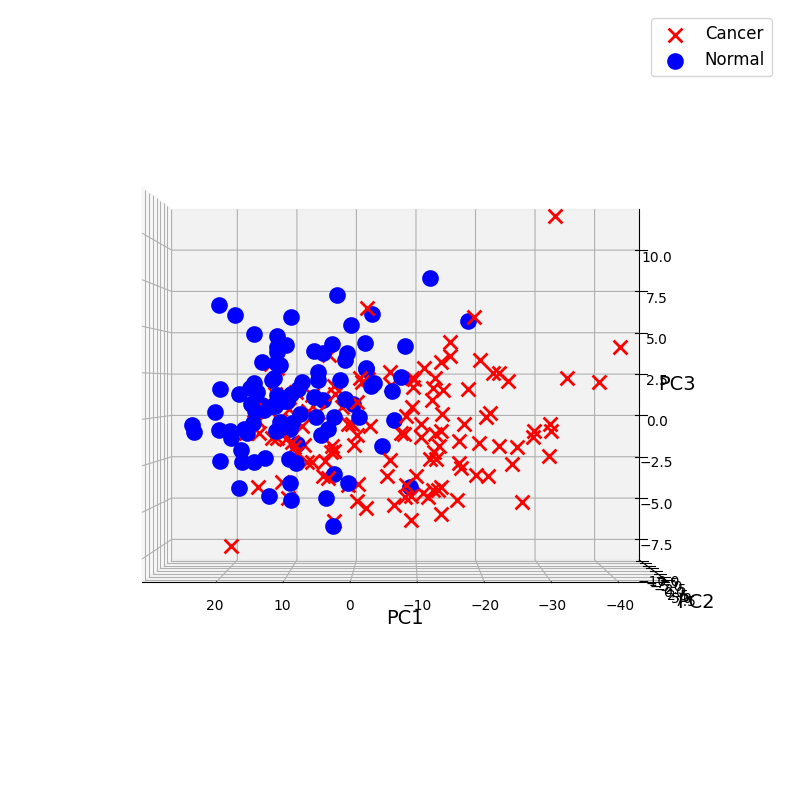

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')
# Initialize lists to hold the plot handles
handles = []

for i in range(obs.shape[0]):
    x = X_proj[i, 0] # PC1
    y = X_proj[i, 1] # PC2
    z = X_proj[i, 2] # PC3

    if grp[i][0] == 'Cancer':
        if i == 120:
            p1 = ax.scatter(x, y, z, color='red', marker='x', linewidth=2, s=100, label='Cancer')  # Increased size
            handles.append(p1)
        else:
            ax.scatter(x, y, z, color='red', marker='x', linewidth=2, s=100)
    else:
        if i == 215:
            p2 = ax.scatter(x, y, z, color='blue', marker='o', linewidth=2, s=100, label='Normal')  # Increased size
            handles.append(p2)
        else:
            ax.scatter(x, y, z, color='blue', marker='o', linewidth=2, s=100)

ax.grid(True)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)

# Set the view angle
ax.view_init(elev=0, azim=90)    # Adjust these values for better visualization: ax.view_init(elev=90, azim=45) vs  ax.view_init(elev=0, azim=90)

# Set limits for better centering (adjust as needed)
# ax.set_xlim([-3, 3])
#ax.set_ylim([-3, 3])
# ax.set_zlim([-3, 3])
plt.savefig('ovariancancer_visu3d_2.png', dpi=300)

# Create the legend using the handles list
plt.legend(handles=handles, fontsize=12)
# plt.title('3D PCA Visualization', fontsize=16)  # Title for the plot
plt.show()

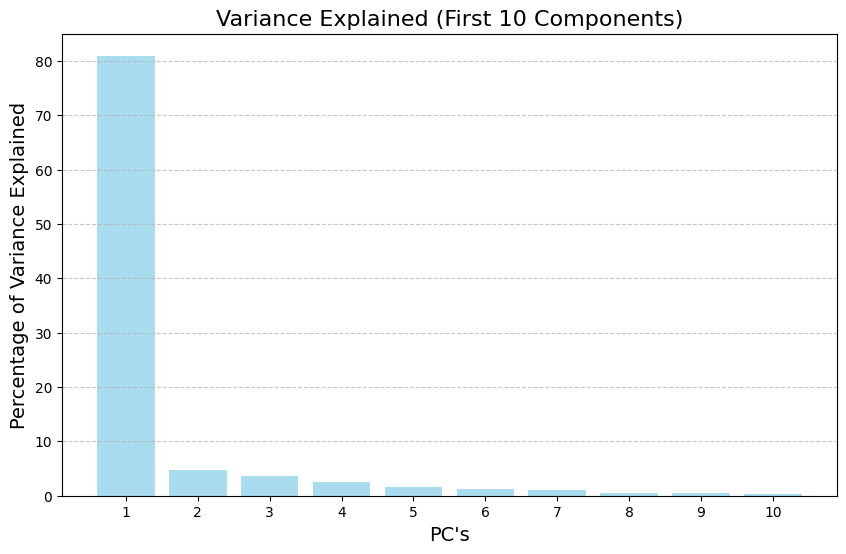

In [ ]:
# Calculate the variance explained by each singular value
explained_variance = S**2
explained_variance_ratio = explained_variance / np.sum(explained_variance) * 100  # Percentage

# Limit to the first 10 components
n_components = 10
explained_variance_ratio_limited = explained_variance_ratio[:n_components]

# Create a bar plot for the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio_limited, alpha=0.7, color='skyblue')
plt.xlabel('PC\'s', fontsize=14)
plt.ylabel('Percentage of Variance Explained', fontsize=14)
plt.title('Variance Explained (First 10 Components)', fontsize=16)
plt.xticks(range(1, n_components + 1))  # Show all index labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('variance_explained_first_10_components.png', dpi=300)
plt.show()



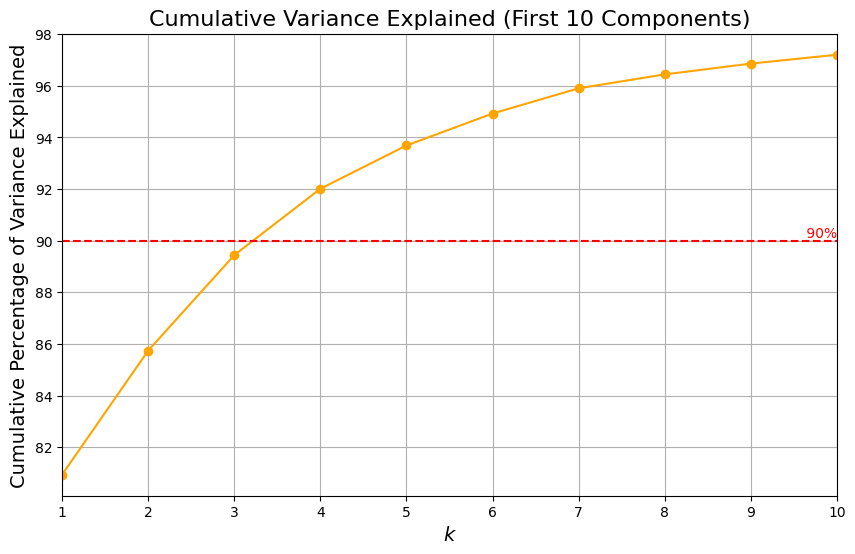

In [ ]:
# Optional: Plot cumulative explained variance for the first 10 components
cumulative_variance_ratio_limited = np.cumsum(explained_variance_ratio_limited)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio_limited, marker='o', color='orange')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Cumulative Percentage of Variance Explained', fontsize=14)
plt.title('Cumulative Variance Explained (First 10 Components)', fontsize=16)
plt.xlim(1, n_components)
plt.grid()
plt.axhline(y=90, color='r', linestyle='--')  # Optional: 90% threshold line
plt.text(n_components, 90, ' 90%', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.savefig('cumulative_variance_explained_first_10_components.png', dpi=300)
plt.show()

# Section 3 - Non-linear PCA

In [ ]:
# Create a dataset that is nonlinear and then apply PCA to the dataset.
from sklearn.datasets import make_moons

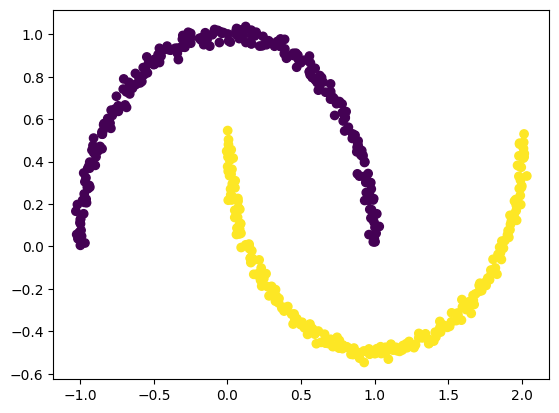

In [ ]:
X, y = make_moons(n_samples=500, noise=0.02, random_state=417)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Let’s apply PCA to this dataset.

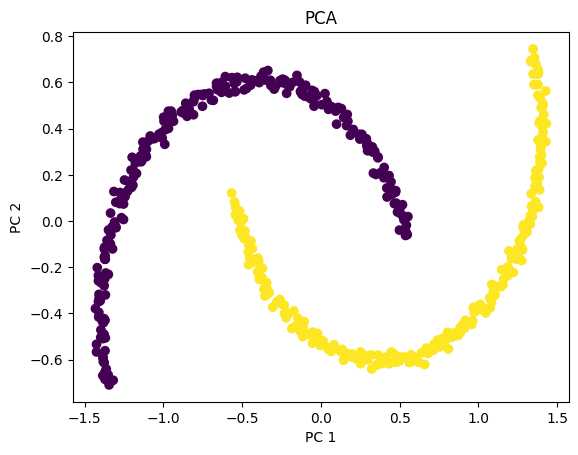

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

As you can see PCA failed to distinguish the two classes.   

Kernel Principal Component Analysis (KPCA) is a technique used in machine learning for nonlinear dimensionality reduction. It is an extension of the classical Principal Component Analysis (PCA) algorithm, which is a linear method that identifies the most significant features or components of a dataset. KPCA applies a nonlinear mapping function to the data before applying PCA, allowing it to capture more complex and nonlinear relationships between the data points.

In KPCA, a kernel function is used to map the input data to a high-dimensional feature space, where the nonlinear relationships between the data points can be more easily captured by linear methods such as PCA. The principal components of the transformed data are then computed, which can be used for tasks such as data visualization, clustering, or classification.

KPCA has some limitations, such as the need to choose an appropriate kernel function and its corresponding parameters, which can be difficult and time-consuming. KPCA can also be computationally expensive for large datasets, as it requires the computation of the kernel matrix for all pairs of data points.

In [ ]:
# Applying kernel PCA on this dataset with Radial Basis Function (RBF) kernel with a gamma value of 15.

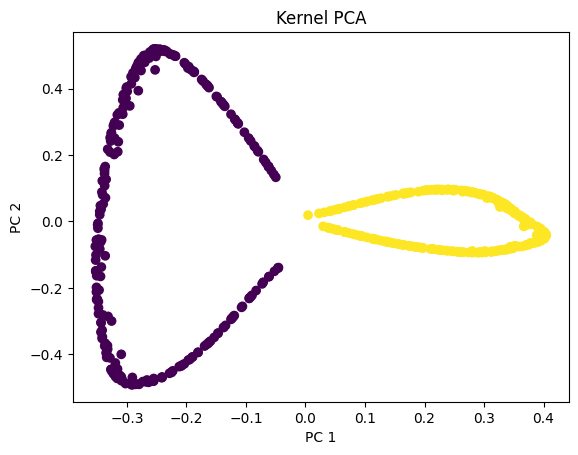

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In the kernel space the two classes are linearly separable. Kernel PCA uses a kernel function to project the dataset into a higher-dimensional space, where it is linearly separable. Finally, we applied the kernel PCA to a non-linear dataset using scikit-learn.

# Section 4 - Eigenfaces

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.io as io

%matplotlib inline

In [ ]:
# load YALE database from http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html
YALE = io.loadmat('/content/Yale_64x64.mat')
fea = YALE['fea']
gnd = YALE['gnd']

# scale pixels to be [0,1]
maxValue = np.amax(fea)
#fea = fea / maxValue. #no obligation to do that for this test

print("X shape: ", fea.shape) # faces in columns
print("Y shape: ", gnd.shape)

X shape:  (165, 4096)
Y shape:  (165, 1)


It consisting of 15 subjects in 11 slightly different poses, for a total of 165 64x64 pixel images conditions.

In [ ]:
# Helper function to display a list of faces with the titles
def plot_gallery(images, titles, save_name, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.savefig(save_name, dpi=300)

In [ ]:
# all images for a specific person
h = 64
w = 64
X_first_person = fea[:-11,:]
print(X_first_person.shape)

(154, 4096)


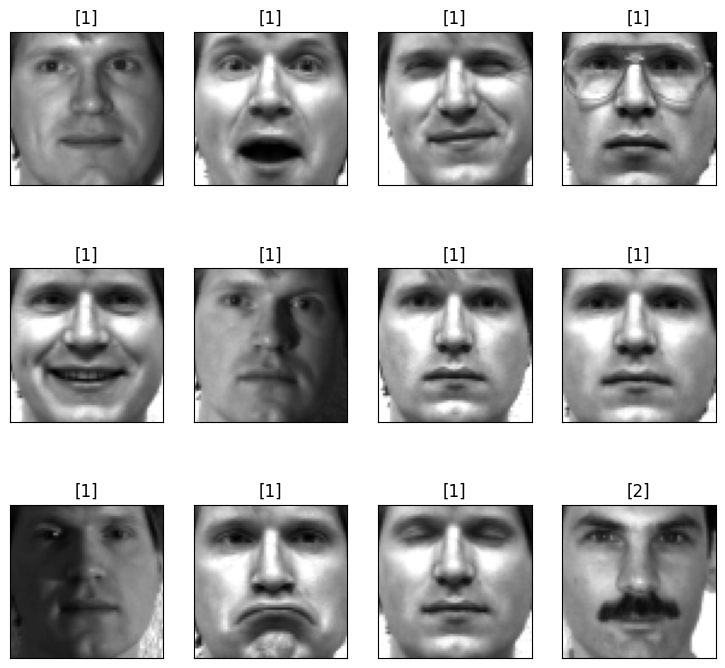

In [ ]:
save_name = 'expressions_one_person.png'
plot_gallery(X_first_person, gnd, save_name, h, w, n_row=3, n_col=4)

(15, 4096)


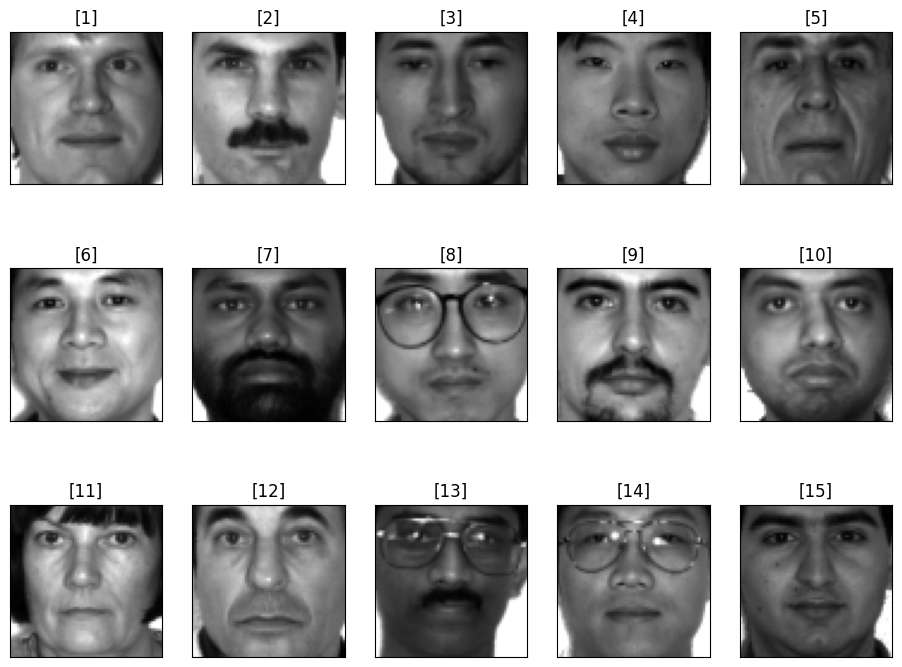

In [ ]:
# A single image for each person in the Yale database
index = np.linspace(0, 165, 15, endpoint=False)
index_int = [int(x) for x in index]
X_all_single = fea[index_int,:]
print(X_all_single.shape)
save_name = 'all_persons.png'
plot_gallery(X_all_single, gnd[index_int], save_name, h, w, n_row=3, n_col=5)

As mentioned before, each image is reshaped into a large row vector, and the average face is computed and subtracted from row column vector. The mean-subtracted image vectors are then stacked horizontally as rows in the data matrix X.

In [ ]:
# Compute mean
X = fea.copy()
print(X.shape)
Xavg = np.mean(X, axis=0)
B = X - Xavg[np.newaxis, :]  # Mean-subtracted Data
[m, n] = B.shape

(165, 4096)


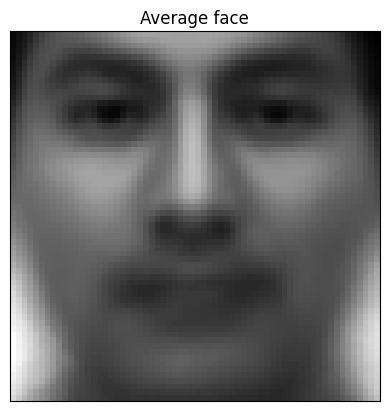

In [ ]:
# Plot the average face
plt.imshow(Xavg.reshape((h, w)).T, cmap=plt.cm.gray)
plt.title('Average face')
plt.xticks(())
plt.yticks(())
plt.savefig('average_face.png', dpi=300)
plt.show()

In [ ]:
# Perform SVD
U, S, Vt = np.linalg.svd(B, full_matrices=False) # B or B/np.sqrt(m), few impact
V = Vt.T
print(V.shape)

(4096, 165)


Let us plot the bar chart of the percentage of the variance explained by each Principal Component.


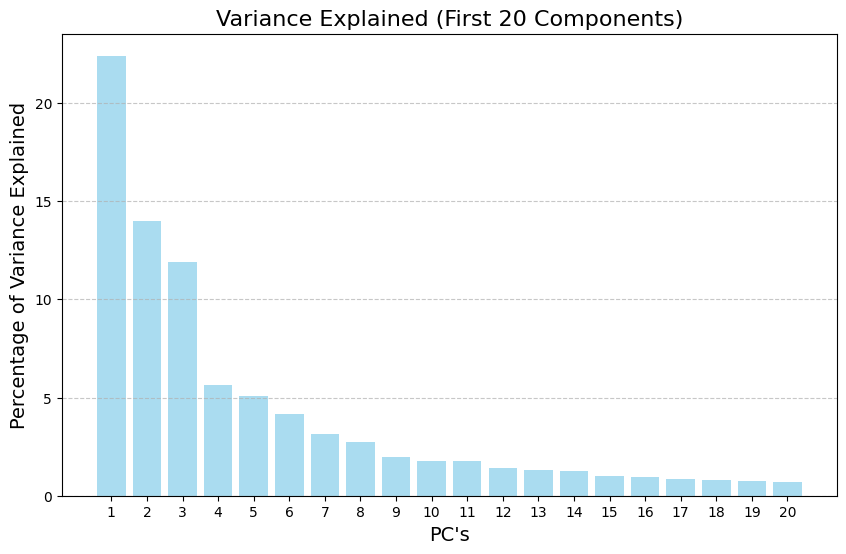

In [ ]:
# Calculate the variance explained by each singular value
explained_variance = S**2
explained_variance_ratio = explained_variance / np.sum(explained_variance) * 100  # Percentage

# Limit to the first 20 components
n_components = 20
explained_variance_ratio_limited = explained_variance_ratio[:n_components]

# Create a bar plot for the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio_limited, alpha=0.7, color='skyblue')
plt.xlabel('PC\'s', fontsize=14)
plt.ylabel('Percentage of Variance Explained', fontsize=14)
plt.title('Variance Explained (First 20 Components)', fontsize=16)
plt.xticks(range(1, n_components + 1))  # Show all index labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('variance_explained_first_20_components.png', dpi=300)
plt.show()

Let us plot the bar chart of the cumulative explained variance.

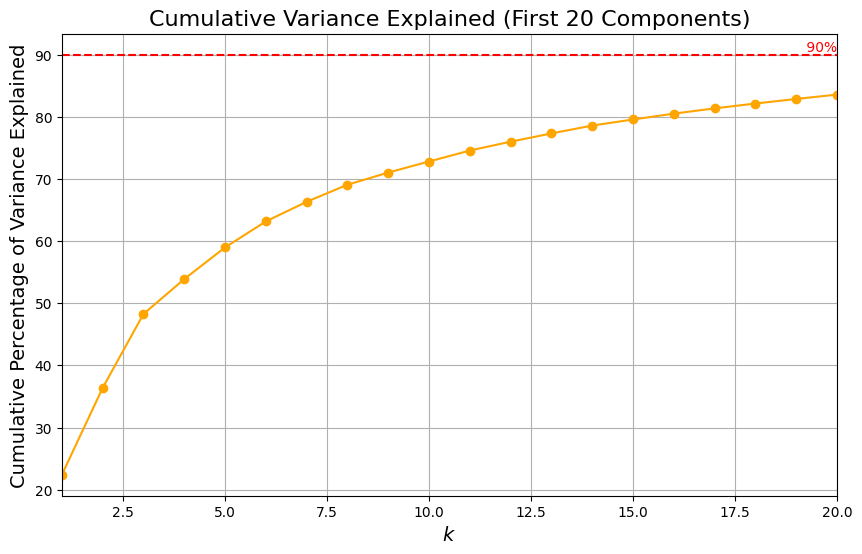

In [ ]:
# Optional: Plot cumulative explained variance for the first 20 components
cumulative_variance_ratio_limited = np.cumsum(explained_variance_ratio_limited)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio_limited, marker='o', color='orange')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Cumulative Percentage of Variance Explained', fontsize=14)
plt.title('Cumulative Variance Explained (First 20 Components)', fontsize=16)
plt.xlim(1, n_components)
plt.grid()
plt.axhline(y=90, color='r', linestyle='--')  # Optional: 90% threshold line
plt.text(n_components, 90, ' 90%', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.savefig('cumulative_variance_explained_first_20_components.png', dpi=300)
plt.show()

We display the top k=20 principal components (the first k=20 columns of V, which are the eigenvectors of the sample covariance matrix $\frac{1}{m} X^T X=A$). \\

Impressively, they look like "faces", these are usually referred to as the $\textit{the Eigenfaces}$.

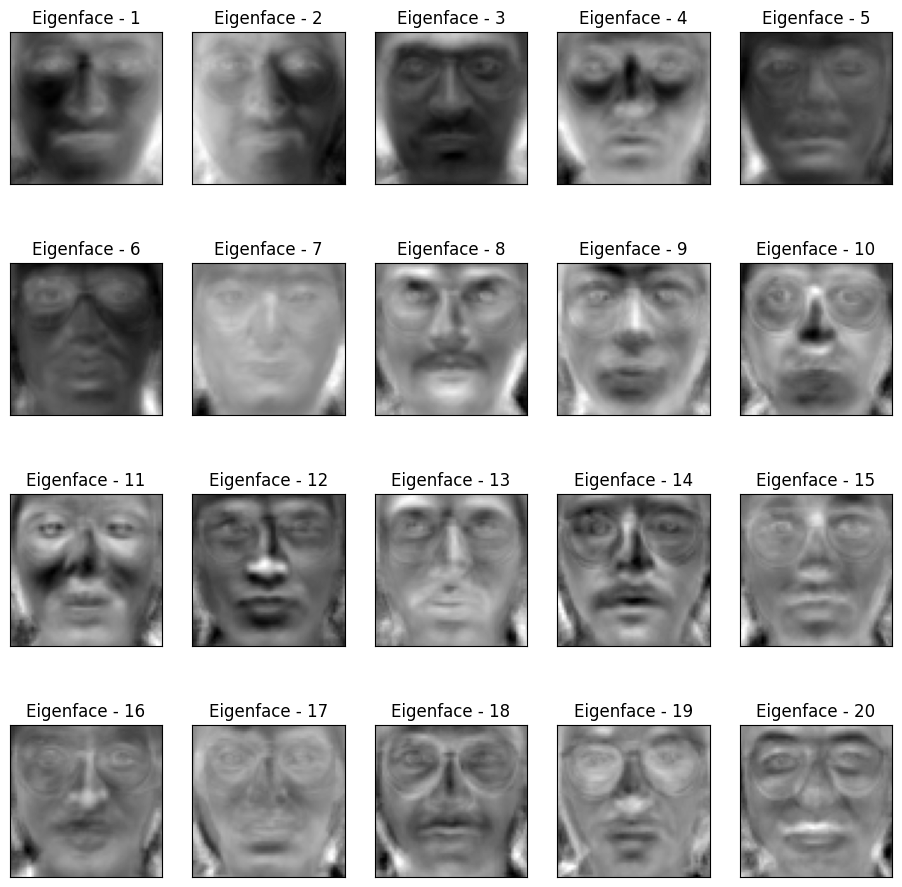

In [ ]:
save_name = 'eigenfaces.png'
title=[]
max_k = 20
for k in range(max_k):
  title.append('Eigenface - ' + str(k+1))

Vk = V[:,:max_k]
plot_gallery(Vk.T, title, save_name, h, w, n_row=4, n_col=5)

Below, we consider a face from the data set, here the second person, denoted $x_{\text{test}}$. \\

And we compute its projection onto the top $k$ the Principal Components
$$x_{\text{proj}_S}^T = x_{\text{test}}^T V_{1:k}V_{1:k}^T, $$
we display the results obtained with increasing values of $k$ to see if the approximation becomes more accurate. \\

According to the cumulative explained variance, top $k=20$ PC's should be "sufficient".

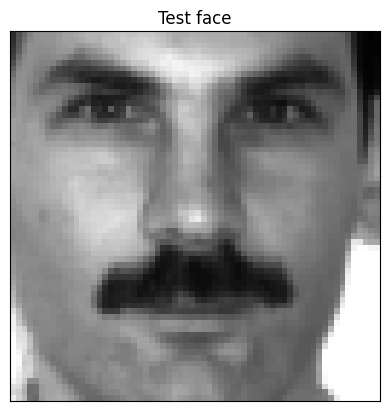

In [ ]:
# Display the test image
x_test = fea[11,:]
plt.imshow(x_test.reshape((h, w)).T, cmap=plt.cm.gray)
plt.title('Test face')
plt.xticks(())
plt.yticks(())
plt.savefig('test_face.png', dpi=300)
plt.show()

In [ ]:
# Compute the projection onto top k PC's
x_test = fea[11,:]
list_k = np.array([1,2,3,5,10,15,20,30,50,100,125])
max_k = len(list_k)
X_proj = np.zeros((max_k+1,n))
X_proj[0,:] = x_test
x_test = x_test-Xavg
title = []
title.append('Test image')
for k in range(max_k):
  Vk = V[:,:list_k[k]]
  X_proj[k+1,:] = x_test.T@Vk@Vk.T+Xavg
  title.append('rank K=' + str(list_k[k]))



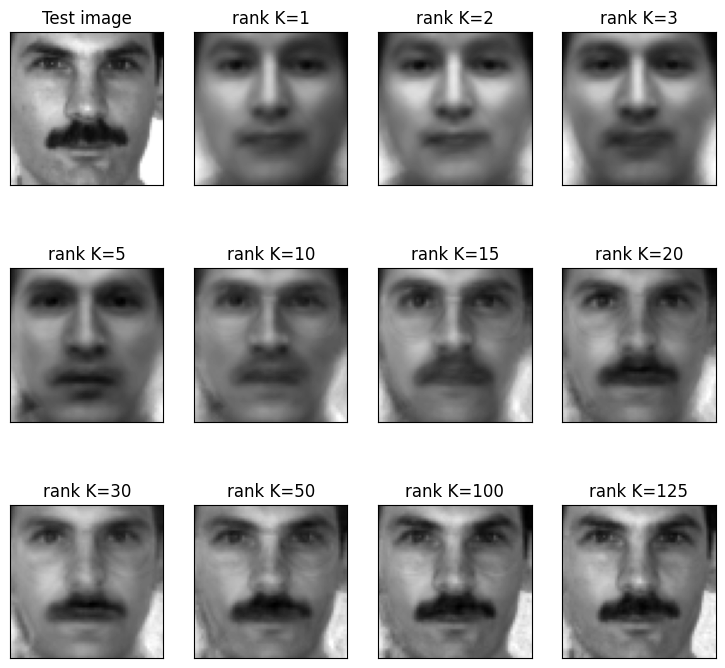

In [ ]:
# Display the projections
save_name = 'proj_firstperson.png'
plot_gallery(X_proj, title, save_name, h, w, n_row=3, n_col=4)

The approximation is relatively poor for $k \leq 15$, although for $k \geq 30$ it converges to a passable representation of the test image.

In [ ]:
# Sanity check 1
k = 20
V_k = V[:,:k]
Xp1 = B@V_k@V_k.T
Xp2 = np.zeros((m,n))
for j in range(k):
  # print(j)
  u = np.reshape(U[:,j],(m,1))
  v = np.reshape(V[:,j],(n,1))
  Xp2 = Xp2 + S[j]*(u@v.T)
print(np.linalg.norm(Xp1 - Xp2))

# Sanity check 2
Lk_1 = B@V_k
Lk_2 = U[:,:k]@np.diag(S[:k])
print(np.linalg.norm(Lk_1 - Lk_2))

# Sanity check 3
x_test = fea[11,:]
LHS = (x_test-Xavg)@V_k@V_k.T + Xavg
RHS = (x_test)@V_k@V_k.T
print(np.linalg.norm(LHS-RHS))


5.306043018997579e-11
5.2232369057648906e-11
829.8438975362832


We further investigate the use of the eigenfaces as a coordinate system, defining an eigenface space.

By projecting an image x onto the first $k$ PCA modes, we obtain a set of coordinates in this space, called the $\textit{Loadings}$ defined as follows:
$$L_{1:k} = X V_{1:k}.$$

Some principal components may capture the most common features shared among all human faces, while other principal components will be more useful for distinguishing between individuals.

Additional principal components may capture differ- ences in lighting angles.

In [ ]:
V_k = V[:,5:7]
# We take all the pictures of persons 2 and 4
idx = np.concatenate([np.arange(11,22),np.arange(33,44)])
B_sub = B[idx,:]
Lk = B_sub@V_k

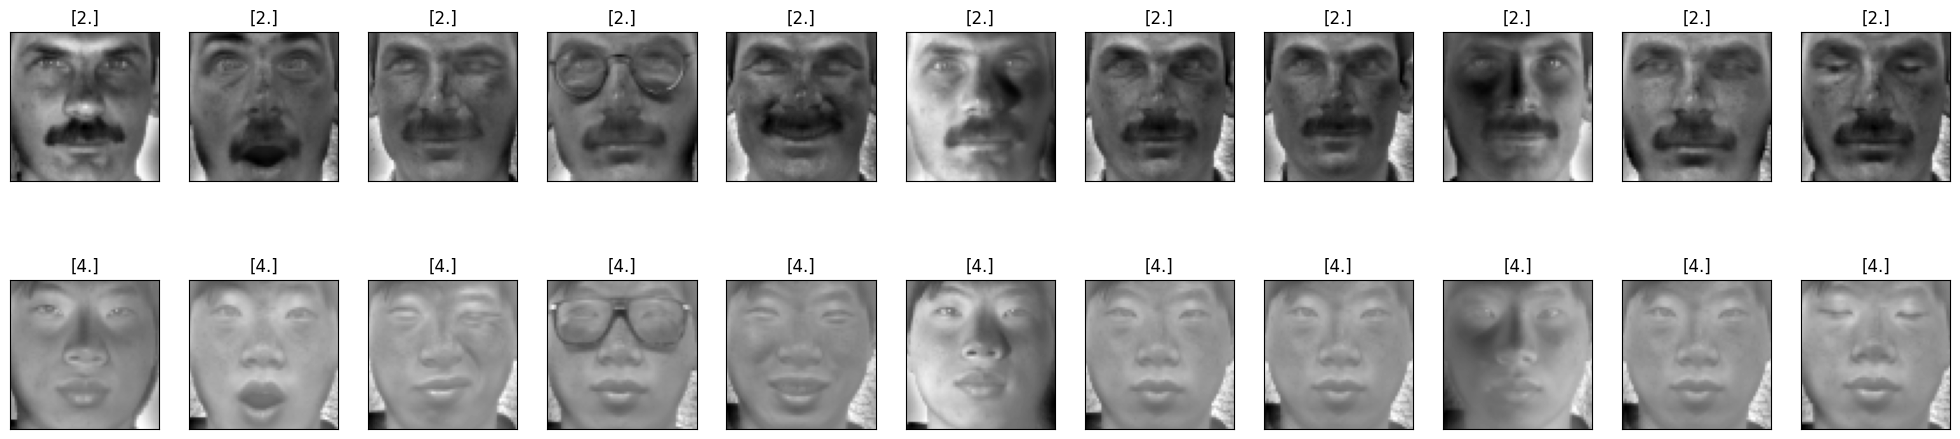

In [ ]:
# We take all the pictures of persons 2 and 4
idx = np.concatenate([np.arange(11,22),np.arange(33,44)])
B_sub = B[idx,:]
title = np.concatenate([2*np.ones((11,1)),4*np.ones((11,1))])
save_name = 'test_projections.png'
plot_gallery(B_sub, title, save_name, h, w, n_row=2, n_col=11)

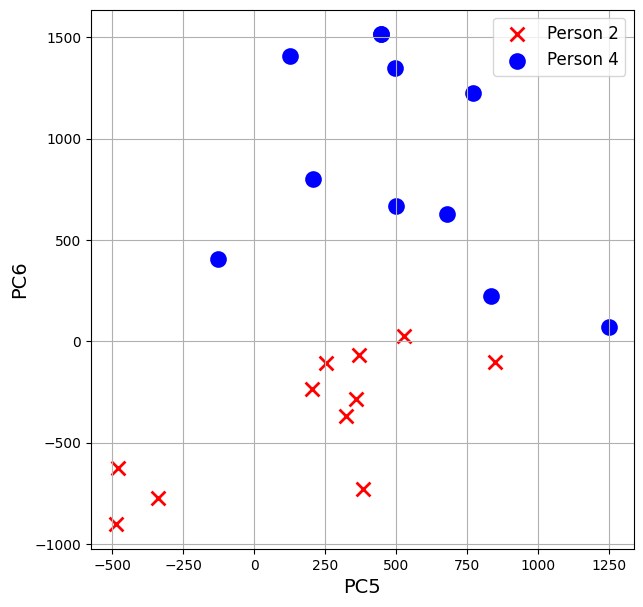

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(7, 7))  # Increased figure size
ax = fig.gca()
# Initialize lists to hold the plot handles
handles = []

for i in range(22):
    x = Lk[i, 0] # PC5
    y = Lk[i, 1] # PC6

    if i <=10:
        if i == 10:
            p1 = ax.scatter(x, y, color='red', marker='x', linewidth=2, s=100, label='Person 2')  # Increased size
            handles.append(p1)
        else:
            ax.scatter(x, y, color='red', marker='x', linewidth=2, s=100)
    else:
        if i == 21:
            p2 = ax.scatter(x, y, color='blue', marker='o', linewidth=2, s=100, label='Person 4')  # Increased size
            handles.append(p2)
        else:
            ax.scatter(x, y, color='blue', marker='o', linewidth=2, s=100)

ax.grid(True)
ax.set_xlabel('PC5', fontsize=14)
ax.set_ylabel('PC6', fontsize=14)


# Create the legend using the handles list
plt.legend(handles=handles, fontsize=12)
# plt.title('3D PCA Visualization', fontsize=16)  # Title for the plot
plt.show()

Projection of all images from two individuals onto the 5th and 6th PCA modes. Projected images of the first individual are indicated with red crosses, and projected images of the second individual are indicated with blue circles.

**Going further**:
If you want to go further with this example, consider a much bigger data set with faces such as Extended Yale Face Database B consisting of cropped and aligned images of 38 individuals (28 from the extended database, and 10 from the original database) under 9 poses and 64 lighting conditions6. Each image is 192 pixels tall and 168 pixels wide. \\

The database can be downloaded at
http://vision.ucsd.edu/ ̃iskwak/ ExtYaleDatabase/ExtYaleB.html

Withc such a database, you will note that the eigenface space is not only useful for representing human faces, but may also be used to approximate a dog
or a cappuccino cup !

**Convince yourselves by trying to project an image of a dog onto the eigenface space with increasing values of** 

 This is possible because the 1600 eigenfaces span a large subspace of the 32256 dimensional image space corresponding to broad, smooth, non-localized spatial features, such as cheeks, forehead, mouths, etc.